In [1]:


from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

 

#%matplotlib inline



# Data cleaning

In [2]:
#Reading my dataset
myData = pd.read_csv('C:/Users/ADMIN/Downloads/Untitled Folder/yield_df.csv')

In [3]:
myData

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [4]:
#Renaming columns for better understanding and usage
myData.rename(columns = {'hg/ha_yield':'yield', 'average_rain_fall_mm_per_year':'avg_rain','pesticides_tonnes':'pesticide', 'Item':'Crop','Area':'Country'}, inplace = True)
myData

,Unnamed: 0,Country,Crop,Year,yield,avg_rain,pesticide,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [5]:
#Deleting first column since it is not needed
ethel=myData.drop(['Unnamed: 0'], axis=1)
ethel

,Country,Crop,Year,yield,avg_rain,pesticide,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [6]:
#Checking for number of null values in the dataset
ethel.isnull().sum().sum()

0

There are no null values in my dataset, it is therefore clean.

In [7]:
#Describing my data to find the mean, standard deviation, maximum and minimum values of columns among others
ethel.describe()

,Year,yield,avg_rain,pesticide,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


# Data analysis and visualisation

In [8]:
#Finding datatypes of columns
ethel.dtypes

Country       object
Crop          object
Year           int64
yield          int64
avg_rain       int64
pesticide    float64
avg_temp     float64
dtype: object

<AxesSubplot:>

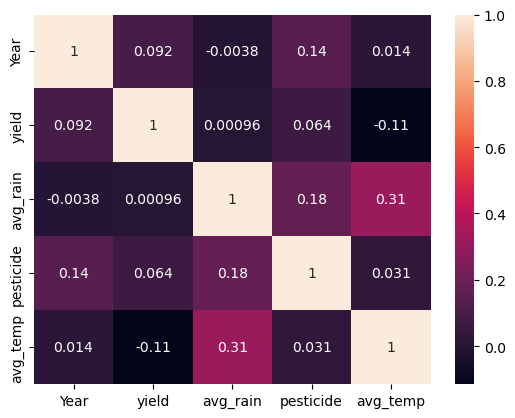

In [9]:
#Creating a correlation matrix/ correlation heatmap to show relationship between different features

sns.heatmap(ethel.corr(),annot= True)

Text(0.5, 1.0, 'Box plot showing yield quantities for crops')

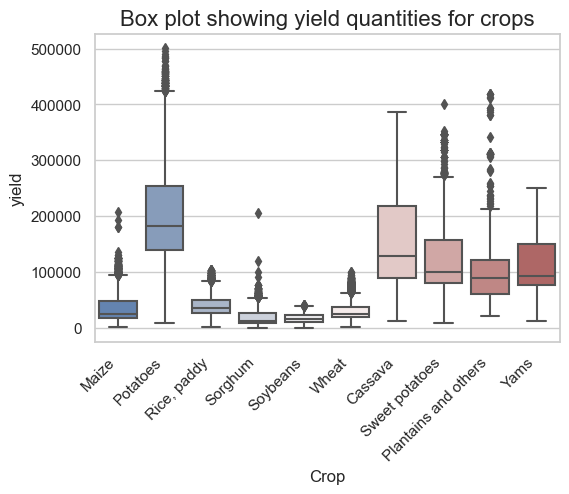

In [10]:
#Box plot to show yield quantities of different crops
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(6,4)) 
sns.boxplot(x="Crop",y="yield",palette="vlag",data=ethel,ax=ax) 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right') 
#Box plot title
ax.set_title('Box plot showing yield quantities for crops',fontsize = 16)

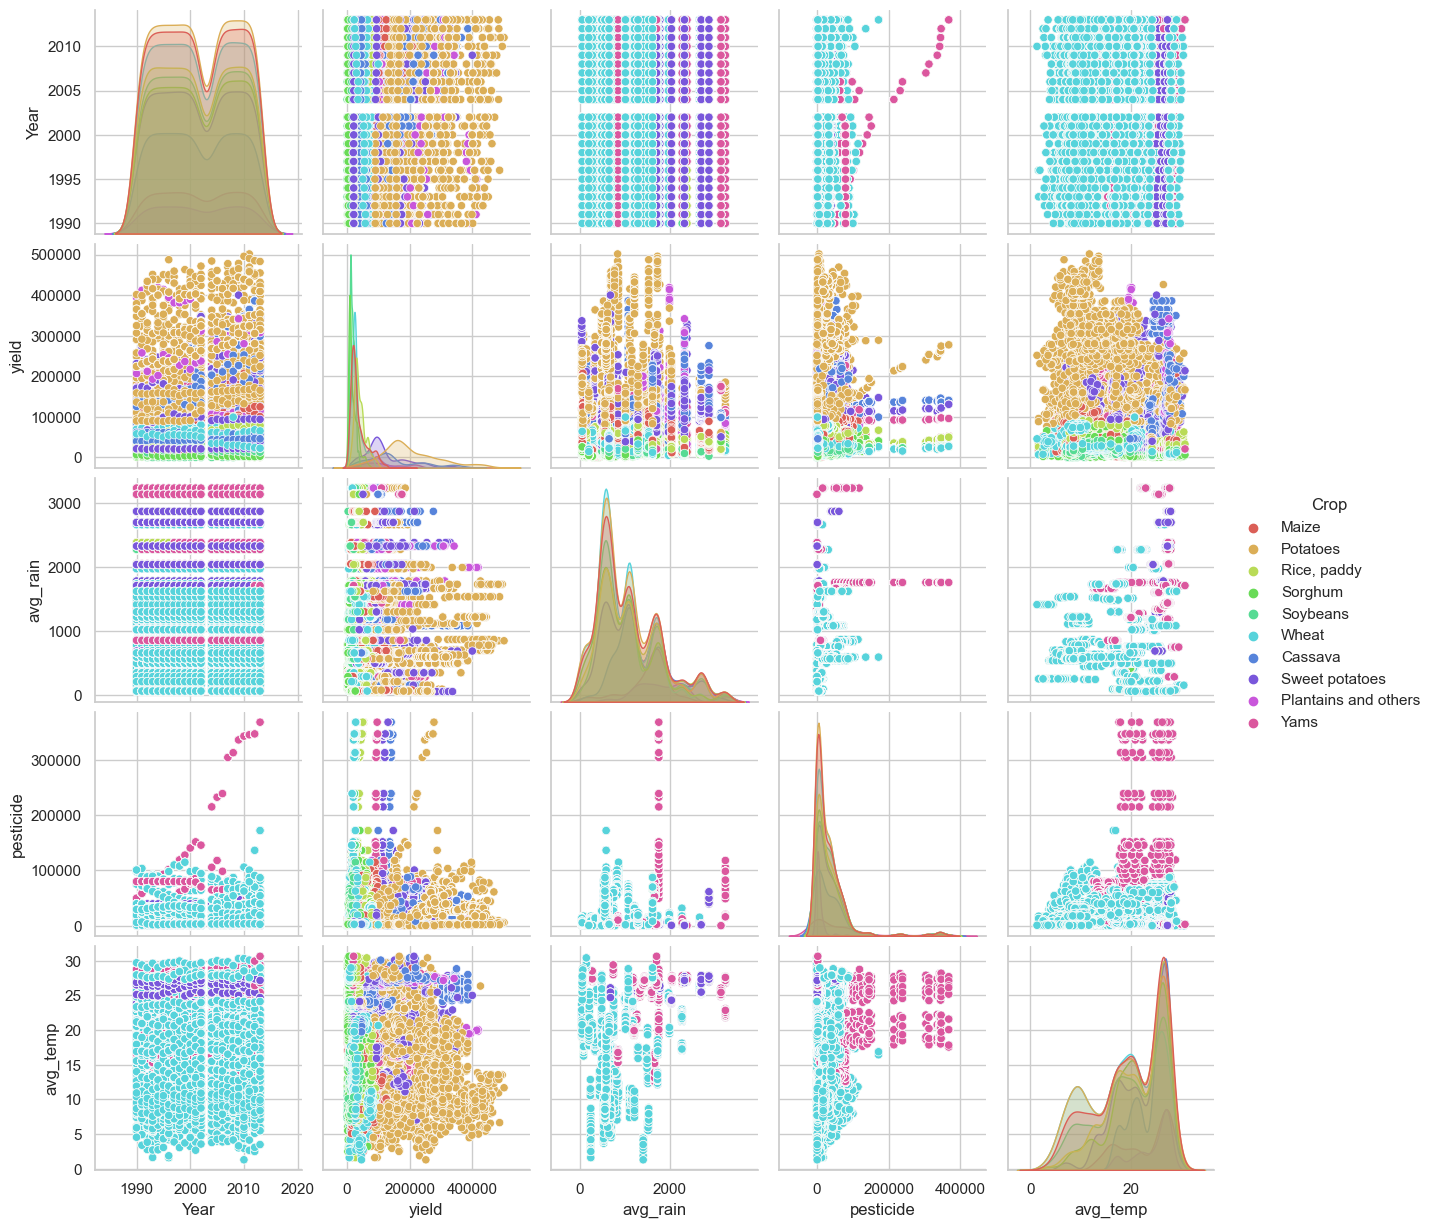

In [11]:
#Scatter plots to find outliers 
df_2=sns.pairplot(ethel, hue='Crop',palette='hls')
print(df_2)

In [12]:
#Finding the top ten countries with the highest yields
df_1=ethel.groupby(['Country'])['yield'].sum().nlargest(10).reset_index(name='Yield')
print(df_1)

          Country      Yield
0           India  327420324
1          Brazil  167550306
2          Mexico  130788528
3           Japan  124470912
4       Australia  109111062
5        Pakistan   73897434
6       Indonesia   69193506
7  United Kingdom   55419990
8          Turkey   52263950
9           Spain   46773540


<AxesSubplot:title={'center':'Bar graph showing yields for the top ten countries approximated'}, xlabel='Country'>

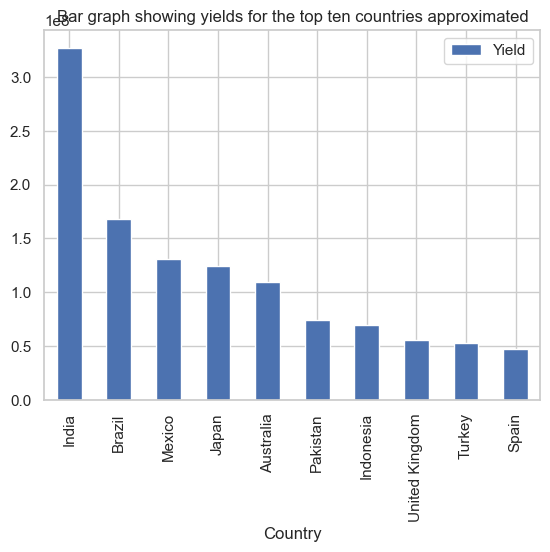

In [13]:
#Drawing a bar graph to show the top ten countries with the hihgest yields
df_1.plot.bar(x='Country',y='Yield',title="Bar graph showing yields for the top ten countries approximated")


# Feature independence plots

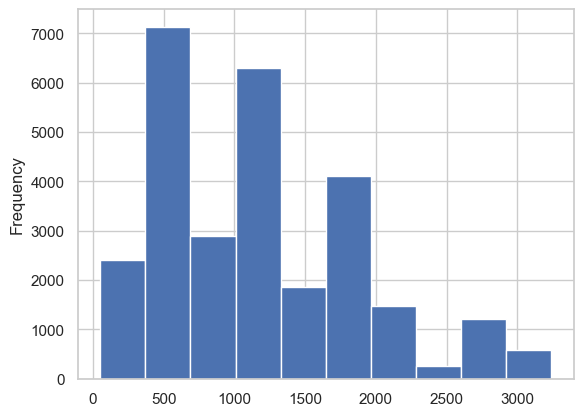

In [14]:
#Bar graph showing frequency of rainfall
ethel['avg_rain'].plot(kind='hist')
plt.show()

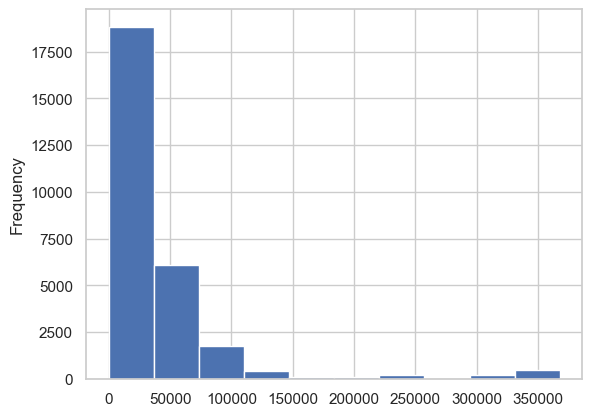

In [15]:
#Histogram showing frequency of pesticides
ethel['pesticide'].plot(kind='hist')
plt.show()

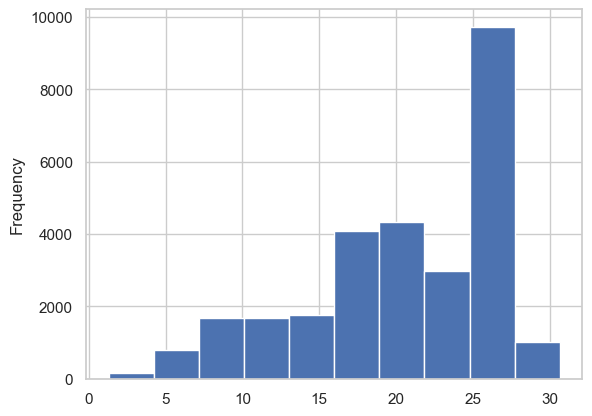

In [16]:
#Histogram showing frequency of temperature
ethel['avg_temp'].plot(kind='hist')
plt.show()

# Splitting Data 

I am to split the dataset into training(70%), validation(20%) and testing data(10%). Before splitting the dataset, Iam to transfer country and crop categorical(non numeric) features into numerals using the get dummies method.

In [17]:
ethel_1 = pd.get_dummies(ethel, columns=['Country',"Crop"])
ethel_1.head()

,Year,yield,avg_rain,pesticide,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Crop_Cassava,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams
0,1990,36613,1485,121.0,16.37,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
#using standard scaler function to rescale year, rainfall, pesticide and temperature values such that they are compared on the same scale of the algorithm.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Year','avg_rain','pesticide','avg_temp']
ethel_1[cols]= sc.fit_transform(ethel_1[cols])
ethel_1.head()

,Year,yield,avg_rain,pesticide,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Crop_Cassava,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams
0,-1.637075,36613,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,66667,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,23333,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,12500,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,7000,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
#Specifying my features(x) to be used in training and my label/yield(y) to be the output
y = ethel_1['yield']
x= ethel_1.drop('yield',axis=1)
x.head()

,Year,avg_rain,pesticide,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Crop_Cassava,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams
0,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_main , x_test, y_main , y_test = train_test_split(x, y ,test_size=0.1, random_state=42)
x_train , x_val, y_train , y_val = train_test_split(x_main, y_main ,test_size=0.2, random_state=42)


# Fitting a Random Forest Regressor model

In [21]:
#Training and Fitting a random forest regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf =RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)
y_pred

array([ 52675.57744411,  19863.39847087,  26851.11010936, ...,
        23433.91463887,  26196.78042288, 100490.15561987])

In [23]:
score = r2_score(y_test,y_pred)
score

0.9496981418435289

Accurcy so far is 94.9698%

# HyperParameter Tunning

In [24]:
#Printing hyper parameters that we used to produce the above accuracy

from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Creating a random grid which will be used to select the best hyper parameter values for a better accuracy

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 400, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(11, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [11, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [300,
                  301,
                  302,
                  303,
                  304,
                  305,
                  306,
                  307,
                  308,
                  309,
                  310,
                  311,
                  312,
                  313,
                  314,
                  315,
                  316,
                  317,
                  318,
                  319,
                  320,
                  321,
                  322,
                  323,
                  324,
                  325,
                  326,
                  327,
                  328,
                  329,
                  330,
                  331,
                  332,
                  333,
                  334,
  

## Using randomised serach CV(Cross Validation) to select the best combination of hyper parameters 

In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs=1)
#Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=395; total time=  14.8s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=395; total time=  17.0s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=395; total time=  17.6s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=  43.7s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=  36.9s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=  32.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=358; 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [11, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 301, 302, 303,
                                                         304, 305, 306, 307,
                                                         308, 309, 310, 311,
                                                         312, 313, 314, 315,
                                                         316, 317, 318, 319,
                                                         320, 321, 322, 323,
               

In [29]:
#the best hyperparameter values
rf_random.best_params_


{'n_estimators': 396,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [23]:
#Using the best combination of hyper parameters obtained to calculate new accuracy
best_model=RandomForestRegressor(n_estimators=396,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= "sqrt",
 max_depth= 40,
 bootstrap= True)
best_model.fit(x_train,y_train)
best_predict=best_model.predict(x_test).round()
score = r2_score(y_test,best_predict)
score

0.9869464696927336

# Model Evaluation


In [32]:
#Evaluating the new model(best_model) using validation dataset
best_model_val=RandomForestRegressor(n_estimators=396,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= "sqrt",
 max_depth= 40,
 bootstrap= True)
best_model_val.fit(x_train,y_train)
best_val_predict=best_model_val.predict(x_val).round()
score = r2_score(y_val,best_val_predict)
score

0.9858639288047053

In [97]:
#Finding mean absolute error and mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_r=mean_absolute_error(y_test,best_predict)
mse_r=mean_squared_error(y_test,best_predict)
print(mae_r)
print(mse_r)


4391.725480912357
94495052.21011709


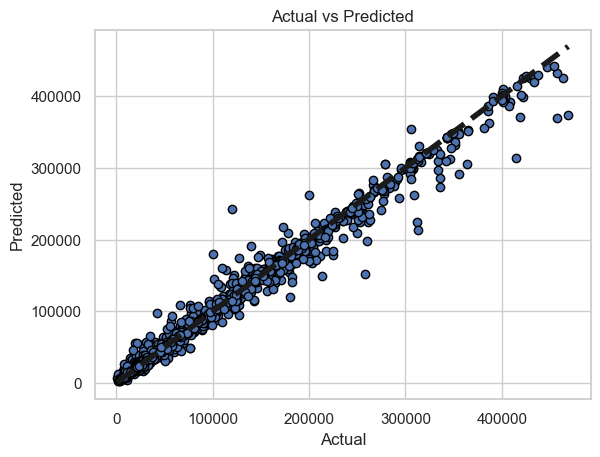

In [99]:
#A scatter plot to show relationship between actual and predicted values
fig, axis = plt.subplots() 
axis.scatter(y_test,best_predict,edgecolors=(0, 0, 0))
axis.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # creating regressor line
axis.set_xlabel('Actual')
axis.set_ylabel('Predicted')
axis.set_title("Actual vs Predicted")
plt.show()

In [26]:
#Confusion matrix to calculate precision, recall and f1-score
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,best_predict))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
#Printing precision, recall and f1-score on testing dataset
classification_report(y_test,best_predict)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_cla

'              precision    recall  f1-score   support\n\n       849.0       0.00      0.00      0.00       1.0\n      1123.0       0.00      0.00      0.00       1.0\n      2036.0       0.00      0.00      0.00       1.0\n      2065.0       0.00      0.00      0.00       1.0\n      2074.0       0.00      0.00      0.00       1.0\n      2333.0       0.00      0.00      0.00       1.0\n      2429.0       0.00      0.00      0.00       1.0\n      2463.0       0.00      0.00      0.00       1.0\n      2480.0       0.00      0.00      0.00       1.0\n      2688.0       0.00      0.00      0.00       1.0\n      2750.0       0.00      0.00      0.00       0.0\n      2860.0       0.00      0.00      0.00       1.0\n      2866.0       0.00      0.00      0.00       1.0\n      2911.0       0.00      0.00      0.00       1.0\n      2996.0       0.00      0.00      0.00       0.0\n      3168.0       0.00      0.00      0.00       1.0\n      3200.0       0.00      0.00      0.00       1.0\n      3

In [34]:
# calculating precision, recall and f1-score using validatin dataset
classification_report(y_val,best_val_predict)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_cla

'              precision    recall  f1-score   support\n\n        80.0       0.00      0.00      0.00         1\n       100.0       0.00      0.00      0.00         1\n       112.0       0.00      0.00      0.00         1\n       227.0       0.00      0.00      0.00         1\n       230.0       0.00      0.00      0.00         1\n       824.0       0.00      0.00      0.00         1\n      1242.0       0.00      0.00      0.00         1\n      1303.0       0.00      0.00      0.00         1\n      1317.0       0.00      0.00      0.00         1\n      1320.0       0.00      0.00      0.00         1\n      1353.0       0.00      0.00      0.00         1\n      1448.0       0.00      0.00      0.00         1\n      1659.0       0.00      0.00      0.00         1\n      1689.0       0.00      0.00      0.00         1\n      1706.0       0.00      0.00      0.00         1\n      1721.0       0.00      0.00      0.00         1\n      1844.0       0.00      0.00      0.00         1\n      2

# Machine Learning Interpretation

In [74]:
#Finding feature importance to enable proper understanding of results
feature_names=list(x_train.columns)
importances=best_model.feature_importances_
feature_importances=pd.DataFrame({"names":feature_names,"importance":importances})
feature_importances=feature_importances.sort_values('importance',ascending=False).reset_index()
feature_importances

,index,names,importance
0,108,Crop_Potatoes,0.281530
1,105,Crop_Cassava,0.069154
2,2,pesticide,0.059113
3,111,Crop_Soybeans,0.057201
4,113,Crop_Wheat,0.052903
...,...,...,...
110,34,Country_Estonia,0.000124
111,17,Country_Botswana,0.000120
112,97,Country_Tunisia,0.000115
113,55,Country_Latvia,0.000112


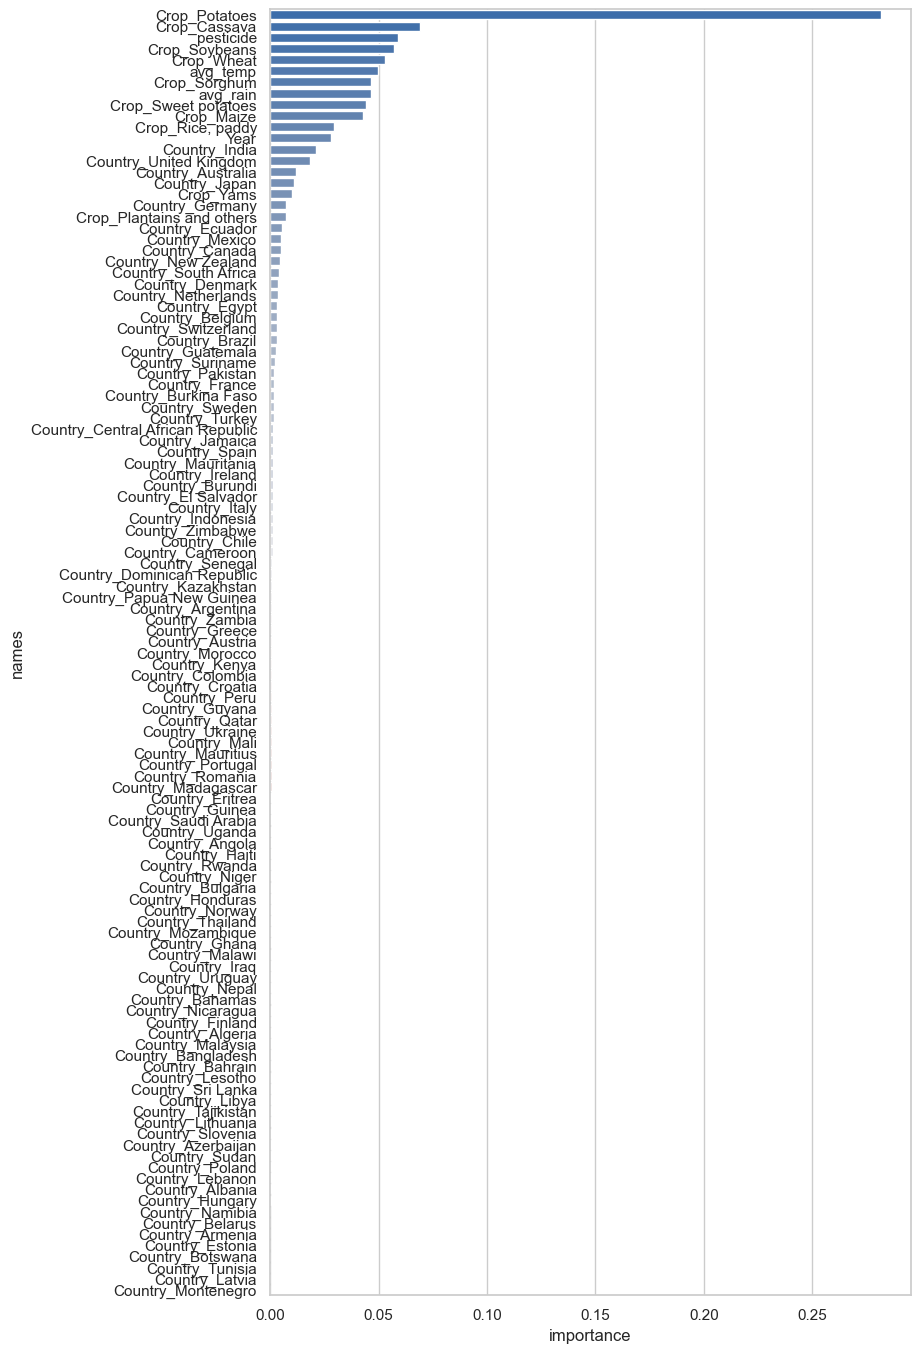

In [78]:
#A bar plot to show feature importance
feature_names=list(x_train.columns)
importances=best_model.feature_importances_
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict({"names":feature_names,"importance":importances})
df.sort_values(ascending=False,by=["importance"],inplace=True)
df=df.dropna()
sns.barplot(x="importance",y="names",palette="vlag",data=df,orient="h",ax=ax);

# Fitting a k-means clustering model


In [36]:
from sklearn.cluster import KMeans

In [37]:
#specifying my indepedent features(x)
x=ethel_1.drop('yield',axis=1)
x.head()

,Year,avg_rain,pesticide,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Crop_Cassava,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams
0,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
#Implementing k-means algorithm using 10 clusters(k)
km=KMeans(n_clusters=10)
ethel_1['cluster']=km.fit_predict(ethel_1)
ethel_1.head()

,Year,yield,avg_rain,pesticide,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams,cluster
0,-1.637075,36613,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5
1,-1.637075,66667,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-1.637075,23333,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
3,-1.637075,12500,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
4,-1.637075,7000,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2


In [39]:
#To show the number of datapoints in each of the ten clusters
ethel_1.cluster.value_counts()

2    7832
5    7115
0    3404
8    2906
6    1948
3    1560
9    1365
1    1106
7     694
4     312
Name: cluster, dtype: int64

# Hyper parameter tunning

In k-means clustering, the main aim is to reduce the reduce the distance between a datapoint and its center in a each cluster. This algprithm I used here has only one hyper parameter n_clusters. To determine the right number of n_clusters, elbow method is used. This plots a graph of distance of data points from centroid/center against a a certain range of clusters. An elbow point is found where after that point, the distance remains almost the same. This point provides the right number of clusters that the algorithm should form.  

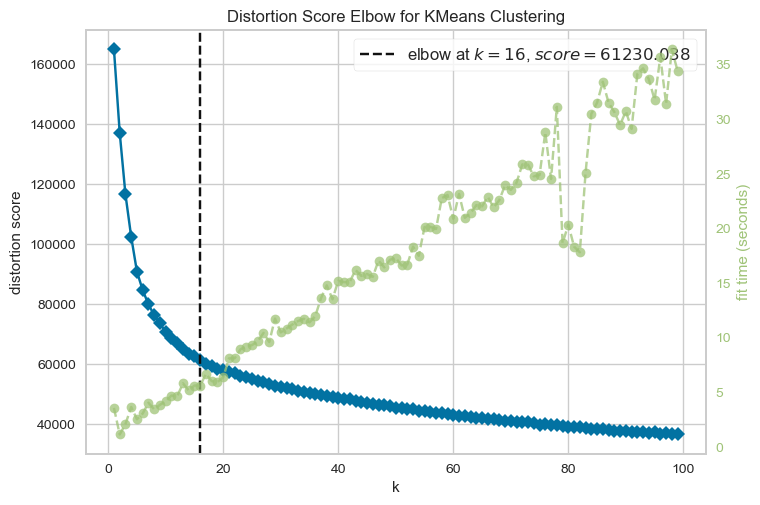

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=42)
visualizer=KElbowVisualizer(km,k=(1,100))
visualizer.fit(x)
visualizer.show()

In [55]:
#Re-clustering after finding the correct number of clusters(16) using elbow method(hyper parameter tunning)
km=KMeans(n_clusters=16)
ethel_1['cluster']=km.fit_predict(ethel_1)
ethel_1

,Year,yield,avg_rain,pesticide,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Crop_Maize,Crop_Plantains and others,Crop_Potatoes,"Crop_Rice, paddy",Crop_Sorghum,Crop_Soybeans,Crop_Sweet potatoes,Crop_Wheat,Crop_Yams,cluster
0,-1.637075,36613,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,13
1,-1.637075,66667,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
2,-1.637075,23333,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.637075,12500,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11
4,-1.637075,7000,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,1.624512,22581,-0.693232,-0.575853,-0.123991,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28238,1.624512,3066,-0.693232,-0.575853,-0.123991,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11
28239,1.624512,13142,-0.693232,-0.575853,-0.123991,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,11
28240,1.624512,22222,-0.693232,-0.575853,-0.123991,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
ethel_1.cluster.value_counts()

0     5143
11    4570
13    4506
9     2494
6     2290
4     2016
2     1446
10    1136
14    1086
3      978
12     847
7      681
1      413
8      324
15     183
5      129
Name: cluster, dtype: int64

# Saving my model

In [50]:
#Saving my random forest regressor model
import joblib
joblib.dump(best_model,"C:/Users/ADMIN/OneDrive/Desktop/MY MODEL/MyModel.sav")

['C:/Users/ADMIN/OneDrive/Desktop/MY MODEL/MyModel.sav']

In [51]:
#Testing my saved model
new_model=joblib.load("C:/Users/ADMIN/OneDrive/Desktop/MY MODEL/MyModel.sav")
new_model.predict(x_test)

array([ 71598.50358093,  22233.91914432,  45103.03792872, ...,
        47659.79699964,  17129.83249473, 105687.30622178])